In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
data = pd.read_csv('C:/Users/Woon.Kim/Downloads/CG_in_US_2015_Public_Use_data_files/data.csv')
data.shape

(7975, 213)

In [111]:
data.isnull().sum().sum()

85270

In [110]:
data = data[data['burden'].notna()]
#data = data[data.columns[data.isnull().mean() < 0.2]]
data.shape

(1575, 213)

In [3]:
data.columns[data.isnull().any()]

Index(['screen', 'sc1b', 'hispir', 'ageir', 'ageirx', 'sc7', 'HHer', 'hhtype',
       'racehh', 'agecr', 'agecrcat', 'selc1', 'q14c', 'lives', 'Q15B',
       'q17ctn', 'q20', 'q20b', 'park', 'q21', 'q21x', 'q21avg', 'q21cat',
       'adls', 'iadls', 'n9', 'q28', 'primary', 'primdet', 'q30', 'q38', 'n12',
       'q35', 'q36', 'q37b', 'q39', 'choice', 'q32a', 'N16ct', 'q34ct', 'n17',
       'n18', 'q45a', 'q45b', 'q45c', 'q45d', 'q45e', 'q45f', 'n19', 'q47a',
       'q48a', 'q48b', 'q48d', 'q48l', 'q48m', 'q48n', 'n21', 'n22', 'd1',
       'd2', 'marital', 'd4', 'd5', 'd6', 'd10', 'd11', 'INTNET', 'LGBT',
       'HH14WGT', 'IND14WGT'],
      dtype='object')

In [4]:
for column in data.columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [5]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title="Report")
#profile

In [6]:
corr = []

for column in data:
    corr.append(data['burden'].corr(data[column]))

In [8]:
corr

[0.03893938442870323,
 nan,
 -0.02990624728888544,
 -0.029906247288885343,
 0.029906247288885766,
 nan,
 0.059883607649105115,
 -0.06278756192482043,
 0.026229829135028596,
 0.040582695805629274,
 0.05341803401094188,
 0.057589807554062095,
 0.07401140664125186,
 0.11166671319292525,
 0.025905211330323415,
 -0.0995659475926377,
 0.1167129270019342,
 0.07608555086324674,
 0.07132568874508192,
 0.06755704453651004,
 0.08646070416864454,
 0.06755704453651004,
 -0.07795314879175483,
 -0.04516936459616171,
 -0.09926846482860874,
 0.10537659794483936,
 0.06523117706657051,
 0.08324767198479761,
 -0.04082980193079883,
 0.03400581163320631,
 0.057589807554062095,
 0.06691165799643344,
 -0.0995659475926377,
 0.1167129270019342,
 0.025905211330323415,
 0.12302217440278068,
 0.010014604148999025,
 0.010663603343485708,
 -0.00012612742396299443,
 -0.022907988835865704,
 nan,
 0.043151549380017196,
 -0.03082877992255522,
 -0.19765131481764214,
 0.23472769252752676,
 0.32257562785922533,
 -0.3490623

In [9]:
corr = [x for x in corr if pd.isnull(x) == False and x != 'nan']


In [10]:
np.percentile(np.abs(corr), 90)

0.44292298667858265

In [11]:
corr2 = []
col2 = []

for column in data:
    if np.abs(data['burdcat'].corr(data[column])) > 0.4:
        corr2.append(data['burdcat'].corr(data[column]))
        col2.append(column)



In [12]:
#lst3 = ['q35', 'q36', 'q37b', 'd1']
lst3 = ['q18', 'agecg', 'agecr']
for item in lst3:
    col2.append(item)

In [13]:
data2 = data[data.columns.intersection(col2)]

In [14]:
data2.drop(['hourscat', 'banhours', 'burdcat'], axis=1, inplace=True)

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [15]:
data2

,agecg,agecr,q18,q22a,q22b,q22c,q22d,adls,q22g,q23d,iadls,hours,burden,n3
3,58,87.0,24.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,4.0,28.0,3.0,2.0
5,37,80.0,23.0,1.0,1.0,2.0,2.0,4.0,1.0,1.0,6.0,0.5,3.0,1.0
13,38,71.0,5.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,5.0,77.0,4.0,1.0
24,64,89.0,14.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,6.0,12.0,2.0,2.0
36,47,81.0,16.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,21.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7969,54,86.0,30.0,1.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,90.0,5.0,1.0
7970,65,89.0,5.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,6.0,20.0,2.0,1.0
7971,47,66.0,13.0,1.0,1.0,1.0,2.0,4.0,1.0,1.0,5.0,40.0,4.0,1.0
7972,46,68.0,33.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,5.0,98.0,5.0,1.0


In [16]:
median = data2.loc[data2['agecr'] < 200, 'agecr'].median()
data2["agecr"] = np.where(data2["agecr"] > 200, median,data2['agecr'])

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_24148\2370522276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["agecr"] = np.where(data2["agecr"] > 200, median,data2['agecr'])


In [17]:
np.mean(data2.groupby(['q18'])['q18'].count())

47.72727272727273

In [18]:
data2.groupby(['q18'])['q18'].count().sort_values(ascending=False)

q18
24.0    215
3.0     156
23.0    118
32.0    115
14.0    115
33.0     78
22.0     77
19.0     70
30.0     64
16.0     64
8.0      61
18.0     59
5.0      58
20.0     46
13.0     45
34.0     44
10.0     38
27.0     29
11.0     28
12.0     18
21.0     16
39.0     12
31.0     10
15.0     10
40.0     10
7.0       5
37.0      5
17.0      3
6.0       2
26.0      1
35.0      1
36.0      1
38.0      1
Name: q18, dtype: int64

In [19]:
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0]
data3 = data2.loc[data['q18'].isin(lst)]

In [20]:
data3["q18"] = data3["q18"].astype(str)
data3["q18"] = data3["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0"], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones"])
data3

C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_24148\12370137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["q18"] = data3["q18"].astype(str)
C:\Users\Woon.Kim\AppData\Local\Temp\ipykernel_24148\12370137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["q18"] = data3["q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"


,agecg,agecr,q18,q22a,q22b,q22c,q22d,adls,q22g,q23d,iadls,hours,burden,n3
3,58,87.0,Aging,2.0,2.0,2.0,2.0,0.0,2.0,1.0,4.0,28.0,3.0,2.0
5,37,80.0,MobilityProblem,1.0,1.0,2.0,2.0,4.0,1.0,1.0,6.0,0.5,3.0,1.0
13,38,71.0,Arthritis,2.0,2.0,2.0,2.0,0.0,1.0,2.0,5.0,77.0,4.0,1.0
24,64,89.0,Cancer,2.0,2.0,2.0,2.0,0.0,2.0,1.0,6.0,12.0,2.0,2.0
36,47,81.0,Diabetes,1.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,21.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7968,46,75.0,Alzheimer,1.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,25.0,4.0,2.0
7969,54,86.0,Stroke,1.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,90.0,5.0,1.0
7970,65,89.0,Arthritis,2.0,2.0,2.0,2.0,0.0,1.0,2.0,6.0,20.0,2.0,1.0
7971,47,66.0,BrokenBones,1.0,1.0,1.0,2.0,4.0,1.0,1.0,5.0,40.0,4.0,1.0


In [21]:
lst2 = ['q22a','q22b','q22c','q22d','q22g','q23d','n3', 'q18']
data3[lst2] = data3[lst2].astype(object)

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [22]:
data3.info()
data3.columns = ['agecg', 'agecr', 'illness', 'help_from_bed', 'help_dressed', 'help_toilet', 'help_bathe', 'adls', 'help_medicine', 'help_meals', 'iadls', 'hours', 'burden', 'medical_tasks']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 3 to 7974
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   agecg   1263 non-null   int64  
 1   agecr   1263 non-null   float64
 2   q18     1263 non-null   object 
 3   q22a    1263 non-null   object 
 4   q22b    1263 non-null   object 
 5   q22c    1263 non-null   object 
 6   q22d    1263 non-null   object 
 7   adls    1263 non-null   float64
 8   q22g    1263 non-null   object 
 9   q23d    1263 non-null   object 
 10  iadls   1263 non-null   float64
 11  hours   1263 non-null   float64
 12  burden  1263 non-null   float64
 13  n3      1263 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 148.0+ KB


In [23]:
"""
data3 = data3[data3['q35'] != 7.0]
data3 = data3[data3['q36'] != 7.0]
data3 = data3[data3['q37b'] != 7.0]
data3 = data3[data3['d1'] != 7.0]
data3.info()
"""

"\ndata3 = data3[data3['q35'] != 7.0]\ndata3 = data3[data3['q36'] != 7.0]\ndata3 = data3[data3['q37b'] != 7.0]\ndata3 = data3[data3['d1'] != 7.0]\ndata3.info()\n"

In [24]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data3, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Plots

In [25]:
data3 = data3.reset_index(drop=True)
#data3.columns = ['agecg', 'agecr', 'illness', 'help_from_bed', 'help_dressed', 'help_toilet', 'help_bathe', 'adls', 'help_medicine', 'help_meals', 'iadls', 'hours', 'burden', 'medical_tasks']
data3

,agecg,agecr,illness,help_from_bed,help_dressed,help_toilet,help_bathe,adls,help_medicine,help_meals,iadls,hours,burden,medical_tasks
0,58,87.0,Aging,2.0,2.0,2.0,2.0,0.0,2.0,1.0,4.0,28.0,3.0,2.0
1,37,80.0,MobilityProblem,1.0,1.0,2.0,2.0,4.0,1.0,1.0,6.0,0.5,3.0,1.0
2,38,71.0,Arthritis,2.0,2.0,2.0,2.0,0.0,1.0,2.0,5.0,77.0,4.0,1.0
3,64,89.0,Cancer,2.0,2.0,2.0,2.0,0.0,2.0,1.0,6.0,12.0,2.0,2.0
4,47,81.0,Diabetes,1.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,21.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,46,75.0,Alzheimer,1.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,25.0,4.0,2.0
1259,54,86.0,Stroke,1.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,90.0,5.0,1.0
1260,65,89.0,Arthritis,2.0,2.0,2.0,2.0,0.0,1.0,2.0,6.0,20.0,2.0,1.0
1261,47,66.0,BrokenBones,1.0,1.0,1.0,2.0,4.0,1.0,1.0,5.0,40.0,4.0,1.0


In [26]:
df_1 = data3.groupby(['illness'])['burden'].median()
df_1 = df_1.to_frame()
df_1.reset_index(inplace=True)
df_1 = df_1.rename(columns = {'index':'illness'})
df_1['illness'] = df_1['illness'].astype(object)

"""
df_2 = data3.groupby(['q18'])['q35'].median()
df_2 = df_2.to_frame()
df_2.reset_index(inplace=True)
df_1['q35'] = df_2['q35']

df_3 = data3.groupby(['q18'])['q36'].median()
df_3 = df_3.to_frame()
df_3.reset_index(inplace=True)
df_1['q36'] = df_3['q36']

df_4 = data3.groupby(['q18'])['q37b'].median()
df_4 = df_4.to_frame()
df_4.reset_index(inplace=True)
df_1['q37b'] = df_4['q37b']

df_5 = data3.groupby(['q18'])['d1'].median()
df_5 = df_5.to_frame()
df_5.reset_index(inplace=True)
df_1['d1'] = df_5['d1']
"""

"\ndf_2 = data3.groupby(['q18'])['q35'].median()\ndf_2 = df_2.to_frame()\ndf_2.reset_index(inplace=True)\ndf_1['q35'] = df_2['q35']\n\ndf_3 = data3.groupby(['q18'])['q36'].median()\ndf_3 = df_3.to_frame()\ndf_3.reset_index(inplace=True)\ndf_1['q36'] = df_3['q36']\n\ndf_4 = data3.groupby(['q18'])['q37b'].median()\ndf_4 = df_4.to_frame()\ndf_4.reset_index(inplace=True)\ndf_1['q37b'] = df_4['q37b']\n\ndf_5 = data3.groupby(['q18'])['d1'].median()\ndf_5 = df_5.to_frame()\ndf_5.reset_index(inplace=True)\ndf_1['d1'] = df_5['d1']\n"

In [27]:
df_1

,illness,burden
0,Aging,2.0
1,Alzheimer,3.0
2,Arthritis,2.5
3,BackProblems,3.0
4,BrokenBones,3.0
5,Cancer,4.0
6,Diabetes,3.0
7,Falling,3.0
8,HeartDisease,3.0
9,LungDisease,4.0


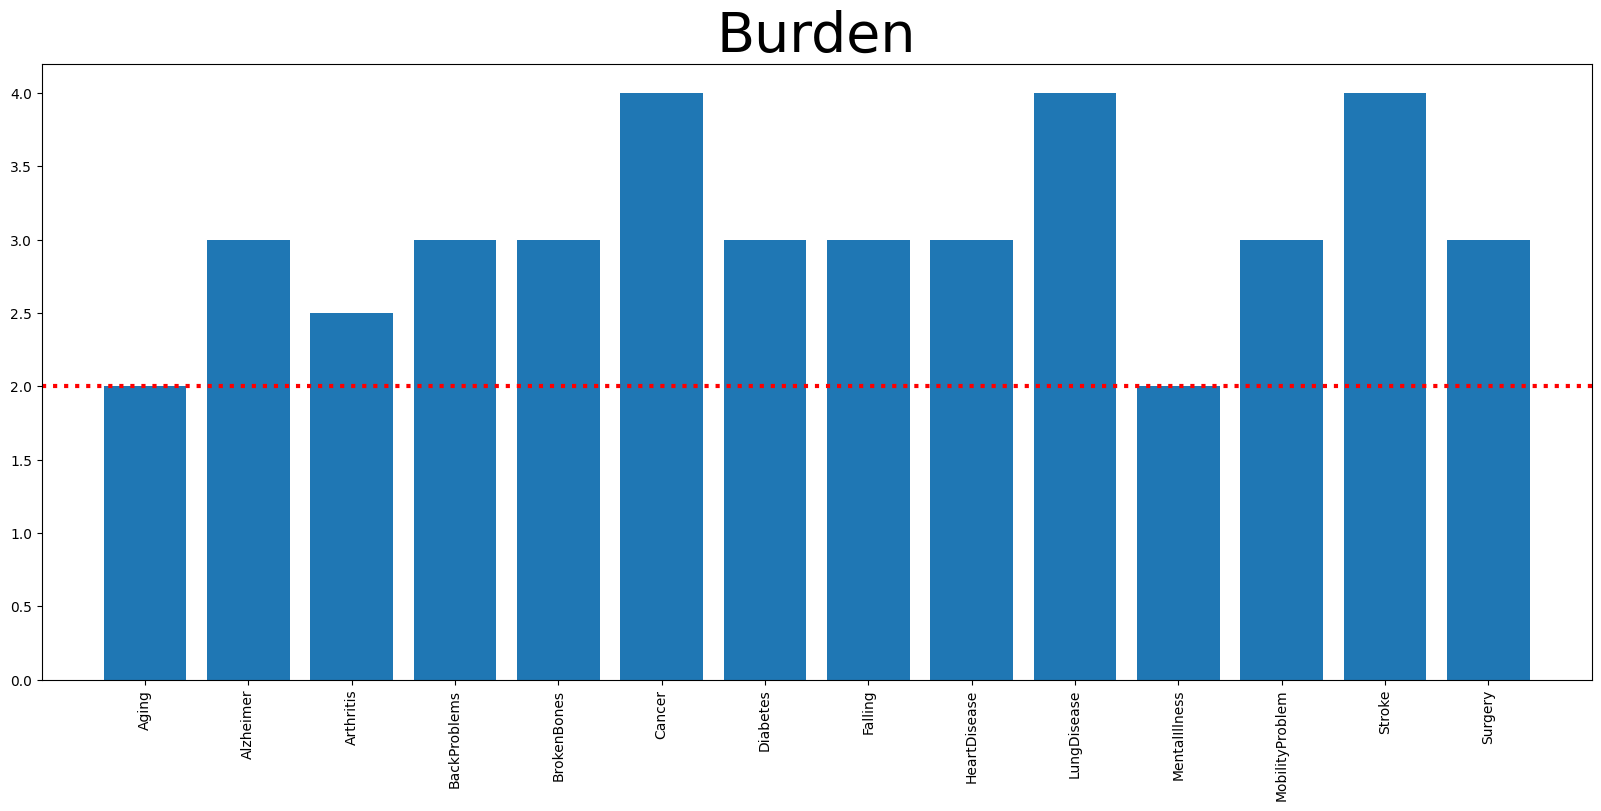

In [28]:
fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['illness'],df_1['burden'])

plt.axhline(y=(df_1[df_1['illness'] == 'Aging']['burden'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "Burden", fontsize=40)
plt.plot()
plt.show()

In [29]:
"""
fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['Illness'],df_1['physical_strain'])

plt.axhline(y=(df_1[df_1['Illness'] == 'Aging']['physical_strain'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "Physical Strain", fontsize=40)
plt.plot()
plt.show()


fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['Illness'],df_1['emotional_stress'])

plt.axhline(y=(df_1[df_1['Illness'] == 'Aging']['emotional_stress'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "Emotional Stress", fontsize=40)
plt.plot()
plt.show()


fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['Illness'],df_1['financial_strain'])

plt.axhline(y=(df_1[df_1['Illness'] == 'Aging']['financial_strain'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "Financial Strain", fontsize=40)
plt.plot()
plt.show()


fig = plt.figure(1, [20, 8])
fig.clf()

ax = fig.add_subplot(111)
ax.set_xlim(-1,14)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.bar(df_1['Illness'],df_1['health_status'])

plt.axhline(y=(df_1[df_1['Illness'] == 'Aging']['health_status'][0]),linewidth= 3, color='r', linestyle= 'dotted')
plt.title(label = "Health Status", fontsize=40)
plt.plot()
plt.show()


"""


'\nfig = plt.figure(1, [20, 8])\nfig.clf()\n\nax = fig.add_subplot(111)\nax.set_xlim(-1,14)\nplt.setp(ax.get_xticklabels(), fontsize=10, rotation=\'vertical\')\nplt.bar(df_1[\'Illness\'],df_1[\'physical_strain\'])\n\nplt.axhline(y=(df_1[df_1[\'Illness\'] == \'Aging\'][\'physical_strain\'][0]),linewidth= 3, color=\'r\', linestyle= \'dotted\')\nplt.title(label = "Physical Strain", fontsize=40)\nplt.plot()\nplt.show()\n\n\nfig = plt.figure(1, [20, 8])\nfig.clf()\n\nax = fig.add_subplot(111)\nax.set_xlim(-1,14)\nplt.setp(ax.get_xticklabels(), fontsize=10, rotation=\'vertical\')\nplt.bar(df_1[\'Illness\'],df_1[\'emotional_stress\'])\n\nplt.axhline(y=(df_1[df_1[\'Illness\'] == \'Aging\'][\'emotional_stress\'][0]),linewidth= 3, color=\'r\', linestyle= \'dotted\')\nplt.title(label = "Emotional Stress", fontsize=40)\nplt.plot()\nplt.show()\n\n\nfig = plt.figure(1, [20, 8])\nfig.clf()\n\nax = fig.add_subplot(111)\nax.set_xlim(-1,14)\nplt.setp(ax.get_xticklabels(), fontsize=10, rotation=\'vertica

In [30]:
"""
#X = data3.loc[:, data3.columns != 'burden']
X = data3
for class_value in range(1,6):
	# get row indexes for samples with this class
	row_ix = np.where(data3['burden'] == class_value)
	# create scatter of these samples
	plt.scatter(X.loc[row_ix, 'burden'], X.loc[row_ix, 'agecg'])
	#plt.show()
# show the plot
plt.show()
"""

"\n#X = data3.loc[:, data3.columns != 'burden']\nX = data3\nfor class_value in range(1,6):\n\t# get row indexes for samples with this class\n\trow_ix = np.where(data3['burden'] == class_value)\n\t# create scatter of these samples\n\tplt.scatter(X.loc[row_ix, 'burden'], X.loc[row_ix, 'agecg'])\n\t#plt.show()\n# show the plot\nplt.show()\n"

In [31]:
data3

,agecg,agecr,illness,help_from_bed,help_dressed,help_toilet,help_bathe,adls,help_medicine,help_meals,iadls,hours,burden,medical_tasks
0,58,87.0,Aging,2.0,2.0,2.0,2.0,0.0,2.0,1.0,4.0,28.0,3.0,2.0
1,37,80.0,MobilityProblem,1.0,1.0,2.0,2.0,4.0,1.0,1.0,6.0,0.5,3.0,1.0
2,38,71.0,Arthritis,2.0,2.0,2.0,2.0,0.0,1.0,2.0,5.0,77.0,4.0,1.0
3,64,89.0,Cancer,2.0,2.0,2.0,2.0,0.0,2.0,1.0,6.0,12.0,2.0,2.0
4,47,81.0,Diabetes,1.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,21.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,46,75.0,Alzheimer,1.0,2.0,1.0,2.0,2.0,2.0,1.0,6.0,25.0,4.0,2.0
1259,54,86.0,Stroke,1.0,1.0,1.0,1.0,6.0,1.0,1.0,7.0,90.0,5.0,1.0
1260,65,89.0,Arthritis,2.0,2.0,2.0,2.0,0.0,1.0,2.0,6.0,20.0,2.0,1.0
1261,47,66.0,BrokenBones,1.0,1.0,1.0,2.0,4.0,1.0,1.0,5.0,40.0,4.0,1.0


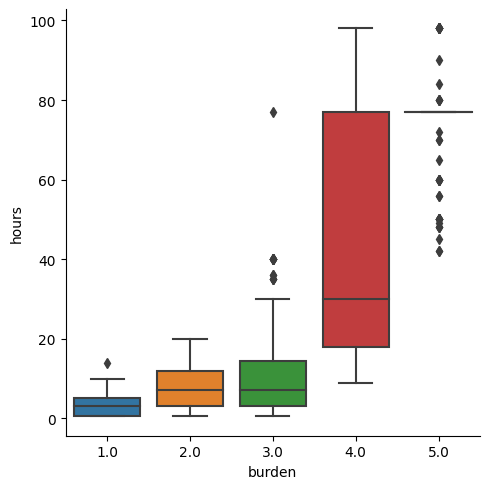

In [32]:
sns.catplot(x="burden", y="hours", kind="box", data=data3)

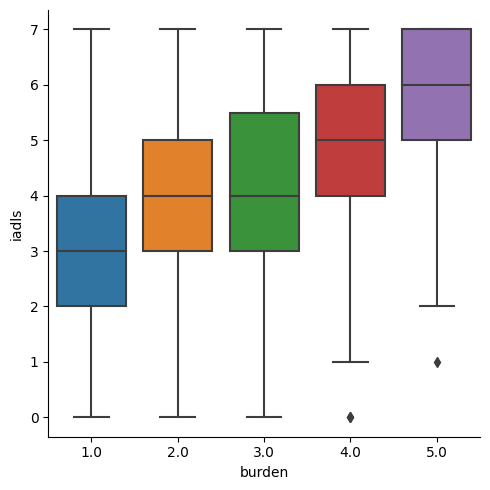

In [33]:
sns.catplot(x="burden", y="iadls", kind="box", data=data3)

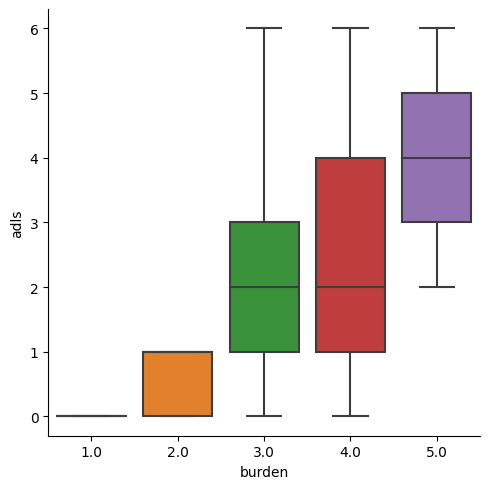

In [34]:
sns.catplot(x="burden", y="adls", kind="box", data=data3)

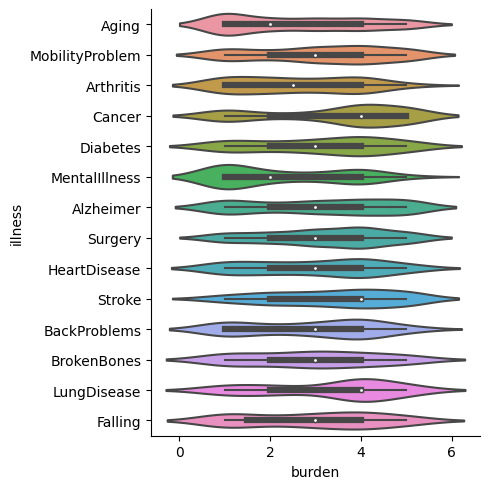

In [35]:
#ill = data3['illness']
#y = data3['burden']

sns.catplot(x="burden", y="illness",
            kind="violin", data=data3)

## Regression

In [36]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_cont = data3.select_dtypes(include=numerics)
df_cat = data3.select_dtypes(include = 'object')

### Dummy Code Categoricals

In [41]:
df_cat_dc = pd.get_dummies(df_cat)
df_cat_dc

,illness_Aging,illness_Alzheimer,illness_Arthritis,illness_BackProblems,illness_BrokenBones,illness_Cancer,illness_Diabetes,illness_Falling,illness_HeartDisease,illness_LungDisease,...,help_bathe_1.0,help_bathe_2.0,help_medicine_1.0,help_medicine_2.0,help_meals_1.0,help_meals_2.0,medical_tasks_1.0,medical_tasks_2.0,medical_tasks_3.0,medical_tasks_4.0
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
1259,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1260,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
1261,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0


In [42]:
df_reg = pd.concat([df_cont, df_cat_dc], axis = 1)
df_reg

,agecg,agecr,adls,iadls,hours,burden,illness_Aging,illness_Alzheimer,illness_Arthritis,illness_BackProblems,...,help_bathe_1.0,help_bathe_2.0,help_medicine_1.0,help_medicine_2.0,help_meals_1.0,help_meals_2.0,medical_tasks_1.0,medical_tasks_2.0,medical_tasks_3.0,medical_tasks_4.0
0,58,87.0,0.0,4.0,28.0,3.0,1,0,0,0,...,0,1,0,1,1,0,0,1,0,0
1,37,80.0,4.0,6.0,0.5,3.0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
2,38,71.0,0.0,5.0,77.0,4.0,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0
3,64,89.0,0.0,6.0,12.0,2.0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0
4,47,81.0,2.0,7.0,21.0,4.0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,46,75.0,2.0,6.0,25.0,4.0,0,1,0,0,...,0,1,0,1,1,0,0,1,0,0
1259,54,86.0,6.0,7.0,90.0,5.0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,0
1260,65,89.0,0.0,6.0,20.0,2.0,0,0,1,0,...,0,1,1,0,0,1,1,0,0,0
1261,47,66.0,4.0,5.0,40.0,4.0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0


### Helper Function 10-CV

In [52]:
# 5-Fold Cross Validation
def cross_validation (df, func):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, shuffle = True, random_state = 10)
    kf_rmse = []
    
    for train, test in kf.split(df):
        X_train = df.iloc[train].loc[:, df.columns != 'burden']
        X_train = X_train.squeeze()
        X_test = df.iloc[test].loc[:, df.columns != 'burden']
        y_train = df.iloc[train].loc[:,'burden']
        y_test = df.iloc[test].loc[:,'burden']
        
        reg = func.fit(X_train, y_train)
        y_hat = reg.predict(X_test)
        
        from sklearn.metrics import mean_squared_error
        kf_rmse.append(mean_squared_error(y_test, y_hat, squared=False))
        
    kf_RMSE = (1/10) * np.sum(kf_rmse)
        
    return (kf_RMSE)

### Linear Regression

In [51]:
#Check which one produces higher R2 score and lower cv-rmse
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = df_reg.loc[:, df_reg.columns != 'burden']
y = df_reg['burden']

model.fit(x, y)

y_hat = model.predict(x)

score = model.score(x, y)

from sklearn.metrics import mean_squared_error
model_train_rmse = mean_squared_error(y, y_hat, squared=False)

model_cv_rmse = cross_validation(df_reg, LinearRegression())

print('train RMSE = ', model_train_rmse)
print('5 CV RMSE = ', model_cv_rmse)
print('score = ', score)
#print(score)

train RMSE =  0.5526462176665569
5 CV RMSE =  0.5647836641389097
score =  0.8515851632258576


### Random Forest

In [67]:
# random forest
from sklearn.ensemble import RandomForestRegressor

x = df_reg.loc[:, df_reg.columns != 'burden']
y = df_reg['burden']

#m = sqrt(p)+1 features
nfeatures = df_reg.shape[1] - 1
model4 = RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1) #random_state ensure random bagging
model4.fit(x,y)

y_hat = model4.predict(x)

score = model4.score(x, y)

from sklearn.metrics import mean_squared_error
model4_train_rmse = mean_squared_error(y, y_hat, squared=False)

model4_cv_rmse = cross_validation(df_reg,RandomForestRegressor(max_features = int(np.sqrt(nfeatures))+1, random_state = 1))

print('train RMSE = ', model4_train_rmse)
print('5 CV RMSE = ', model4_cv_rmse)
print('score = ', score)

train RMSE =  0.0843206750864275
5 CV RMSE =  0.22725365693671887
score =  0.996544976031516


<BarContainer object of 19 artists>

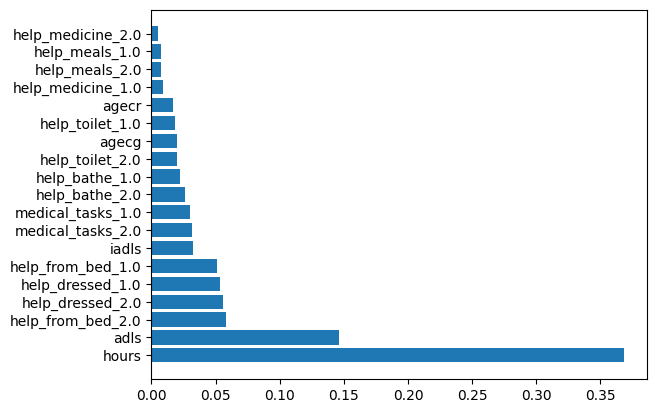

In [68]:
df_feature = pd.DataFrame(zip(x.columns, model4.feature_importances_), columns = ['importance','feature'])
df_feature = df_feature.sort_values(by=['feature'], ascending=False)
plt.barh(df_feature['importance'][0:19], df_feature['feature'][0:19])

### Classification

In [75]:
from sklearn.linear_model import LogisticRegression

x = df_reg.loc[:, df_reg.columns != 'burden']
y = df_reg['burden']

model = LogisticRegression(random_state=0)
model.fit(x,y)
y_hat = model.predict(x)

from sklearn.metrics import accuracy_score
model_train_accuracy = accuracy_score(y, y_hat)
#score = model.score(x, y)

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, x, y, cv = 10, scoring='accuracy')
model_cv_accuracy = (1/10)*np.sum(accuracy)

print('train accuracy = ', model_train_accuracy)
print('10 CV accuracy = ', model_cv_accuracy)

c:\Users\Woon.Kim\Anaconda33\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Woon.Kim\Anaconda33\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

train accuracy =  0.8091844813935075
10 CV accuracy =  0.7910323709536309


c:\Users\Woon.Kim\Anaconda33\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
